# Feature importance
- Decision_Tree_04.ipynb 파일을 기반으로 하여 작성
---

## 전처리된 데이터 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import time

In [3]:
# 월별, item 별 금,토,일요일에 판매된 빈도 추가
# mean 이용하여 pivot
# 즉, 금토일에만 팔렸으면 1, 월화수목에만 팔렸으면 0
df = pd.read_pickle('../Team_data/data_3.pkl')
df

,month_id,shop_id,item_id,cnt_month,city_id,cat_id,main_cat,sub_cat,year,month,...,price_mean_mean_cnt_3,item_id/city_id_mean_cnt_1,item_id/city_id_mean_cnt_2,item_id/city_id_mean_cnt_3,shop_id/cat_id_mean_cnt_1,shop_id/cat_id_mean_cnt_2,shop_id/cat_id_mean_cnt_3,hd_mean_1,hd_mean_2,hd_mean_3
827691,3,25,8092,3.0,13,40,11,6,2013,4,...,0.0,1.000000,2.142857,0.0,1.087262,1.048394,0.000000,1.0,0.75,0.0
827692,3,25,7850,3.0,13,30,8,54,2013,4,...,0.0,3.714286,2.285714,0.0,3.651685,2.276650,0.000000,0.5,0.40,0.0
827693,3,25,8051,3.0,13,66,14,47,2013,4,...,0.0,0.000000,0.428571,0.0,1.827586,1.389474,0.000000,0.0,0.00,0.0
827694,3,25,8088,1.0,13,55,13,4,2013,4,...,0.0,0.285714,0.000000,0.0,0.598291,0.562107,0.000000,1.0,0.00,0.0
827695,3,25,8089,1.0,13,55,13,4,2013,4,...,0.0,0.571429,0.000000,0.0,0.598291,0.562107,0.000000,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860573,34,45,18454,NaN,20,55,13,4,2015,11,...,0.0,0.500000,0.000000,0.0,0.126866,0.106061,0.128242,1.0,0.00,0.0
8860574,34,45,16188,NaN,20,64,14,42,2015,11,...,0.0,0.000000,0.000000,0.0,0.094488,0.000000,0.000000,0.0,0.00,0.0
8860575,34,45,15757,NaN,20,55,13,4,2015,11,...,0.0,0.000000,0.000000,0.0,0.126866,0.106061,0.128242,0.0,0.00,0.0
8860576,34,45,19648,NaN,20,40,11,6,2015,11,...,0.0,0.000000,0.000000,0.0,0.083756,0.112455,0.083426,0.0,0.00,0.0


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [5]:
df.columns

Index(['month_id', 'shop_id', 'item_id', 'cnt_month', 'city_id', 'cat_id',
       'main_cat', 'sub_cat', 'year', 'month', 'sales_month', 'cnt_month_1',
       'cnt_month_2', 'cnt_month_3', 'item_id_mean_cnt_1',
       'item_id_mean_cnt_2', 'item_id_mean_cnt_3', 'sub_cat_mean_cnt_1',
       'sub_cat_mean_cnt_2', 'sub_cat_mean_cnt_3', 'price_mean_mean_cnt_1',
       'price_mean_mean_cnt_2', 'price_mean_mean_cnt_3',
       'item_id/city_id_mean_cnt_1', 'item_id/city_id_mean_cnt_2',
       'item_id/city_id_mean_cnt_3', 'shop_id/cat_id_mean_cnt_1',
       'shop_id/cat_id_mean_cnt_2', 'shop_id/cat_id_mean_cnt_3', 'hd_mean_1',
       'hd_mean_2', 'hd_mean_3'],
      dtype='object')

In [6]:
x_train = df[df['month_id']<33].drop('cnt_month', axis = 1)
y_train = df[df['month_id']<33]['cnt_month']
y_train = y_train.clip(0,20)

x_test = df[df['month_id']==33].drop('cnt_month', axis = 1)
y_test = df[df['month_id']==33]['cnt_month']
y_test = y_test.clip(0,20)

---

In [7]:
time_start = time.time()

tree = DecisionTreeRegressor(max_depth = 9, min_samples_leaf = 5,
                            random_state=42)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

rmse = mean_squared_error(y_test, y_pred)**0.5

time_finish = time.time() - time_start

print('time :{}, rmse = {}'.format(time_finish, rmse))

time :91.81030344963074, rmse = 0.844038349087545


# Feature importance

In [8]:
# Feature importance

tree.feature_importances_

array([3.53632795e-03, 1.09886461e-02, 6.78926293e-03, 1.34668595e-05,
       5.80911721e-02, 4.69875223e-04, 1.78385198e-02, 3.23021676e-05,
       2.09497948e-02, 2.94486022e-02, 7.07966928e-01, 2.62303347e-02,
       6.88429554e-03, 4.57130766e-02, 1.06682360e-03, 2.97452795e-04,
       2.64271296e-03, 8.64436377e-04, 9.92556723e-04, 5.94514202e-04,
       6.89591365e-04, 3.14073865e-04, 4.45336655e-03, 1.28718024e-04,
       1.89737490e-04, 4.70062995e-02, 4.85480625e-03, 2.99681815e-04,
       4.21802584e-04, 1.63941404e-04, 6.68792509e-05])

In [9]:
tree.feature_importances_.shape

(31,)

In [10]:
x_train.columns

Index(['month_id', 'shop_id', 'item_id', 'city_id', 'cat_id', 'main_cat',
       'sub_cat', 'year', 'month', 'sales_month', 'cnt_month_1', 'cnt_month_2',
       'cnt_month_3', 'item_id_mean_cnt_1', 'item_id_mean_cnt_2',
       'item_id_mean_cnt_3', 'sub_cat_mean_cnt_1', 'sub_cat_mean_cnt_2',
       'sub_cat_mean_cnt_3', 'price_mean_mean_cnt_1', 'price_mean_mean_cnt_2',
       'price_mean_mean_cnt_3', 'item_id/city_id_mean_cnt_1',
       'item_id/city_id_mean_cnt_2', 'item_id/city_id_mean_cnt_3',
       'shop_id/cat_id_mean_cnt_1', 'shop_id/cat_id_mean_cnt_2',
       'shop_id/cat_id_mean_cnt_3', 'hd_mean_1', 'hd_mean_2', 'hd_mean_3'],
      dtype='object')

In [11]:
feature_lists = list(x_train.columns)

In [12]:
f_name = pd.DataFrame(feature_lists, columns = ['feature_name'])
f_importance = pd.DataFrame(tree.feature_importances_, columns = ['feature_importance'])

feature_df = pd.concat([f_name, f_importance], axis =1)
feature_df

,feature_name,feature_importance
0,month_id,0.003536
1,shop_id,0.010989
2,item_id,0.006789
3,city_id,0.000013
4,cat_id,0.058091
5,main_cat,0.000470
6,sub_cat,0.017839
7,year,0.000032
8,month,0.020950
9,sales_month,0.029449


In [13]:
feature_df.sort_values(by = 'feature_importance', ascending = False)

,feature_name,feature_importance
10,cnt_month_1,0.707967
4,cat_id,0.058091
25,shop_id/cat_id_mean_cnt_1,0.047006
13,item_id_mean_cnt_1,0.045713
9,sales_month,0.029449
11,cnt_month_2,0.026230
8,month,0.020950
6,sub_cat,0.017839
1,shop_id,0.010989
12,cnt_month_3,0.006884


In [14]:
import seaborn as sns

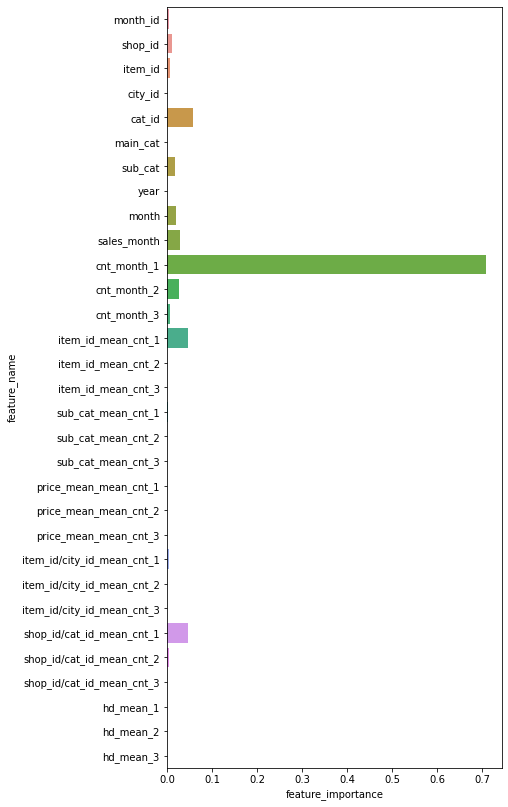

In [15]:
plt.figure(figsize = (6,14))
sns.barplot(y='feature_name',x='feature_importance',
            data = feature_df,
           orient='h')
plt.show()

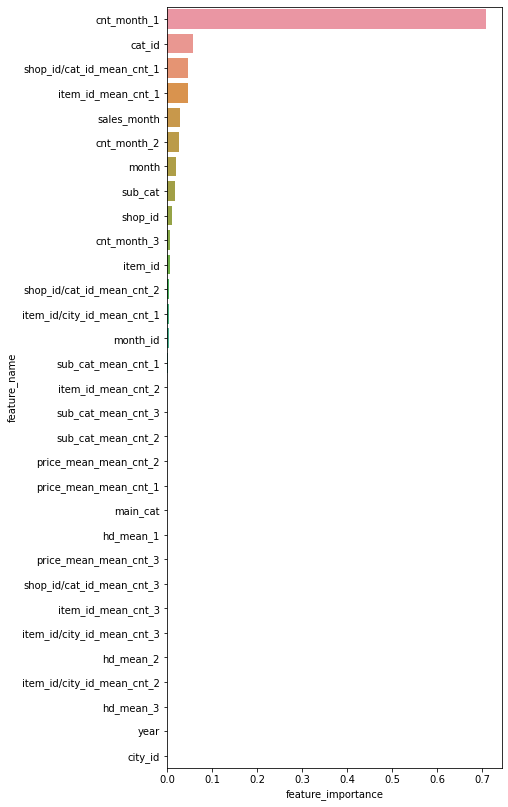

In [16]:
f_sorted = feature_df.sort_values(by = 'feature_importance', ascending = False)

plt.figure(figsize = (6,14))
sns.barplot(y='feature_name',x='feature_importance',
            data = f_sorted,
           orient='h')
plt.show()

---